In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import cv2

In [9]:
image_directory = '/home/rauf/datasets/ir/kaist/images/'
annotation_file = 'train_kaist.json'

In [10]:
example_coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


In [11]:
categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

Custom COCO categories: 
person



In [12]:
category_ids = example_coco.getCatIds(catNms=['square'])
image_ids = example_coco.getImgIds(catIds=category_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]

In [13]:
image_data

{'file_name': 'set00/V008/lwir/I01018.jpg',
 'height': 480,
 'width': 640,
 'id': 1165}

In [14]:
def draw_bboxes(image, annotations, category_names = ['','person', 'car']):
    for ann in annotations:
        x,y,w,h = ann['bbox']
        x,y,w,h = int(x), int(y), int(w), int(h)
        class_id = ann['category_id']
        if class_id == 1:
            color = (0, 255, 0)
        elif class_id == 2:
            color = (0,0,255)
        else:
            continue
            color = (255, 0 , 0)
        cv2.rectangle(image,(x,y),(x+w,y+h),color,2)
        
    

[{'image_id': 2580, 'category_id': 1, 'id': 4807, 'bbox': [505.0, 224.0, 46.0, 104.0], 'area': 4784.0}]


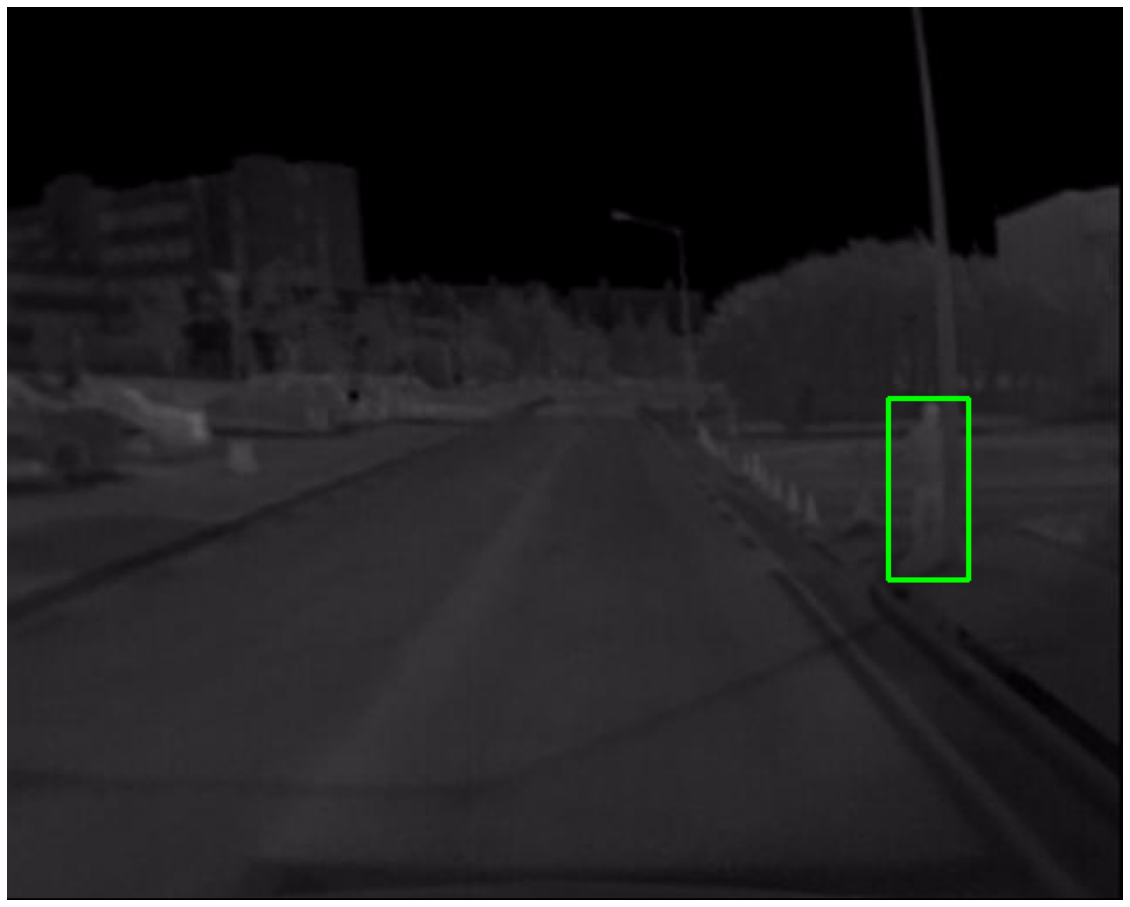

In [32]:
# load and display instance annotations
# image = io.imread(image_directory + image_data['file_name'])
category_ids = example_coco.getCatIds(catNms=['square'])
image_ids = example_coco.getImgIds(catIds=category_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]

image = cv2.imread(image_directory + image_data['file_name'])

annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
draw_bboxes(image, annotations)

plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (20.0, 30.0)
print(annotations)
# example_coco.showAnns(annotations)

In [41]:
!pwd

/home/rauf/icevision
